In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('3323.csv', on_bad_lines='skip')

In [3]:
df

,time,Primus/FLOW_N2O,Solar8000/ART_MBP,Solar8000/HR,Solar8000/ART_SBP,Solar8000/ART_DBP,Primus/SET_AGE,Primus/FLOW_O2,Solar8000/PLETH_HR,Primus/CO2,...,SNUADC/PLETH,Solar8000/NIBP_SBP,SNUADC/ECG_II,Solar8000/PLETH_SPO2,Solar8000/NIBP_MBP,SNUADC/ECG_V5,Primus/AWP,Primus/PAMB_MBAR,Primus/VENT_LEAK,SNUADC/ART
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,-198.250397,NaN,-4.95626,NaN,NaN,-4.95626,-20.0000,NaN,NaN,-494.504028
2,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0016,...,-198.249603,NaN,-4.95624,NaN,NaN,-4.95624,-19.9984,1010.0,12.0,-494.502045
3,3.0,NaN,-10.0,122.0,-10.0,-10.0,69.0,NaN,124.0,NaN,...,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2457,2457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2458,2458.0,0.0,NaN,NaN,NaN,NaN,69.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.0,12.0,NaN
2459,2459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2460 non-null   float64
 1   Primus/FLOW_N2O       380 non-null    float64
 2   Solar8000/ART_MBP     924 non-null    float64
 3   Solar8000/HR          969 non-null    float64
 4   Solar8000/ART_SBP     836 non-null    float64
 5   Solar8000/ART_DBP     836 non-null    float64
 6   Primus/SET_AGE        380 non-null    float64
 7   Primus/FLOW_O2        380 non-null    float64
 8   Solar8000/PLETH_HR    937 non-null    float64
 9   Primus/CO2            2 non-null      float64
 10  Solar8000/NIBP_DBP    869 non-null    float64
 11  Primus/FLOW_AIR       380 non-null    float64
 12  SNUADC/PLETH          2 non-null      float64
 13  Solar8000/NIBP_SBP    869 non-null    float64
 14  SNUADC/ECG_II         2 non-null      float64
 15  Solar8000/PLETH_SPO2 

In [5]:
df = df.apply(lambda row: row.fillna(row.mean()), axis=1)
df

,time,Primus/FLOW_N2O,Solar8000/ART_MBP,Solar8000/HR,Solar8000/ART_SBP,Solar8000/ART_DBP,Primus/SET_AGE,Primus/FLOW_O2,Solar8000/PLETH_HR,Primus/CO2,...,SNUADC/PLETH,Solar8000/NIBP_SBP,SNUADC/ECG_II,Solar8000/PLETH_SPO2,Solar8000/NIBP_MBP,SNUADC/ECG_V5,Primus/AWP,Primus/PAMB_MBAR,Primus/VENT_LEAK,SNUADC/ART
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000
1,1.0,-103.095278,-103.095278,-103.095278,-103.095278,-103.095278,-103.095278,-103.095278,-103.095278,0.0000,...,-198.250397,-103.095278,-4.95626,-103.095278,-103.095278,-4.95626,-20.0000,-103.095278,-103.095278,-494.504028
2,2.0,0.000000,25.111589,25.111589,25.111589,25.111589,25.111589,0.000000,25.111589,0.0016,...,-198.249603,25.111589,-4.95624,25.111589,25.111589,-4.95624,-19.9984,1010.000000,12.000000,-494.502045
3,3.0,48.500000,-10.000000,122.000000,-10.000000,-10.000000,69.000000,48.500000,124.000000,48.5000,...,48.500000,48.500000,48.50000,100.000000,48.500000,48.50000,48.5000,48.500000,48.500000,48.500000
4,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,...,4.000000,4.000000,4.00000,4.000000,4.000000,4.00000,4.0000,4.000000,4.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2456.0,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.0000,...,2456.000000,2456.000000,2456.00000,2456.000000,2456.000000,2456.00000,2456.0000,2456.000000,2456.000000,2456.000000
2457,2457.0,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.0000,...,2457.000000,2457.000000,2457.00000,2457.000000,2457.000000,2457.00000,2457.0000,2457.000000,2457.000000,2457.000000
2458,2458.0,0.000000,507.000000,507.000000,507.000000,507.000000,69.000000,0.000000,507.000000,507.0000,...,507.000000,507.000000,507.00000,507.000000,507.000000,507.00000,507.0000,1010.000000,12.000000,507.000000
2459,2459.0,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.0000,...,2459.000000,2459.000000,2459.00000,2459.000000,2459.000000,2459.00000,2459.0000,2459.000000,2459.000000,2459.000000


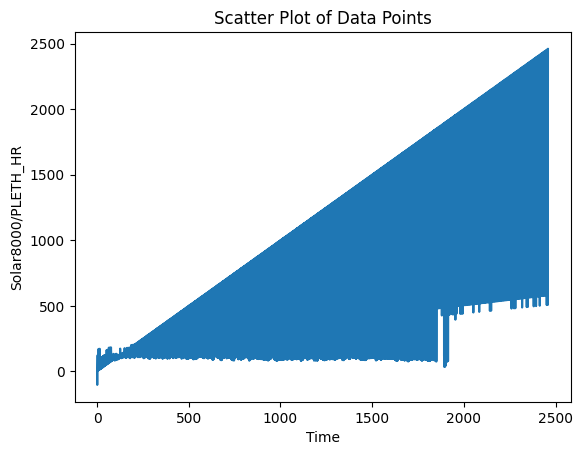

In [13]:
plt.plot(df["time"], df["Solar8000/PLETH_HR"])
plt.xlabel("Time")
plt.ylabel("Solar8000/PLETH_HR")
plt.title("Scatter Plot of Data Points")
plt.show()

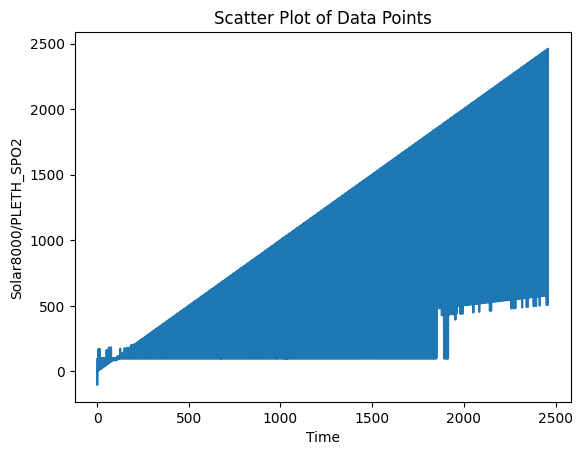

In [14]:
plt.plot(df["time"], df["Solar8000/PLETH_SPO2"])
plt.xlabel("Time")
plt.ylabel("Solar8000/PLETH_SPO2")
plt.title("Scatter Plot of Data Points")
plt.show()

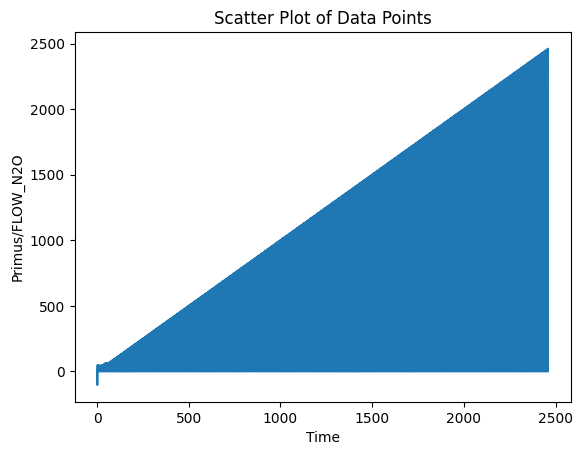

In [15]:
plt.plot(df["time"], df["Primus/FLOW_N2O"])
plt.xlabel("Time")
plt.ylabel("Primus/FLOW_N2O")
plt.title("Scatter Plot of Data Points")
plt.show()

stopped here

In [6]:
imputer = SimpleImputer(strategy='mean')

In [7]:
imputer

SimpleImputer()

In [ ]:
df_imputed = imputer.fit_transform(df.values)

In [ ]:
plt.plot(df['time'], df['Solar8000/HR'])

In [ ]:
df_imputed

In [ ]:
CO2_column_index = 23 
X = np.delete(df_imputed, CO2_column_index, axis=1)  
y = df_imputed[:, CO2_column_index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
column_names = df.columns[:-1]

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
shap.summary_plot(shap_values, X_test, feature_names=column_names, show=False)
plt.title("Summary Plot 1")

plt.subplot(1, 2, 2)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("Summary Plot 2")

plt.tight_layout()  
plt.show() 

In [ ]:
plt.plot(df['RelativeTimeMilliseconds'], df['CO2'])

In [ ]:
shap.dependence_plot("Feature 0", shap_values, X_test, interaction_index="Feature 25")

In [ ]:
shap.dependence_plot("Feature 0", shap_values, X_test, interaction_index="Feature 23")

In [ ]:
shap.dependence_plot("Feature 0", shap_values, X_test, interaction_index="Feature 22")

In [ ]:
shap.dependence_plot("Feature 0", shap_values, X_test, interaction_index="Feature 23")

In [ ]:
shap.plots.force(explainer.expected_value, shap_values, X_test)

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0], X_test[0], matplotlib=True)

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0], X_test[0][0], matplotlib=True)